In [42]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [43]:
Consumer_Key = "OZSPt2YMbHue3XQ4Y9cFRe9rK"
Consumer_Secret_Key = "sivoOWqrW3M1YuLvEUrb2rjlfFluTkpK4PQ4cN96sQnWOl1jTm"
Access_Token = "1316706657552855043-990tzBCPEpyggoOSXxWM3GLekoY1zT"
Access_Token_Secret = "PcNLCwWhiHXpLIg5hYLb3wZea2bAyQfbkyXcVrgwS4zUx"

In [44]:
auth = tweepy.OAuthHandler(Consumer_Key,Consumer_Secret_Key)
auth.set_access_token(Access_Token,Access_Token_Secret)
api = tweepy.API(auth, wait_on_rate_limit = True)

In [40]:
posts = api.user_timeline(screen_name = "JoeBiden", count = 100, lang = "en", tweet_mode="extended")

print("Show the 5 recent tweets: \n")
i = 1
for tweet in posts[0:5]:
    print(str(i) + ') ' + tweet.full_text + '\n')
    i = i+1

Show the 5 recent tweets: 

1) You have the power to own the outcome of this election — but only if you vote.

Head to https://t.co/eoxT07uII9 and make your plan to cast your ballot today.

2) Wear a mask. Wash your hands. Vote out Donald Trump.

3) I’ve had a rule my entire life: No matter what’s happening, no matter how important the meeting, I’ll always answer a call from my grandchildren. https://t.co/mmsB1GOxAu

4) We are in a battle for the soul of the nation. 

The forces of darkness, the forces of division, the forces of yesterday are pulling us apart, holding us down, and holding us back.

We must free ourselves of all of them.

5) RT @TheDemocrats: If you live in any of these states and you plan to vote by mail, your ballot must be requested by sometime this week. Fin…



In [46]:
df = pd.DataFrame([tweet.full_text for tweet in posts] , columns=['Tweets'])
df.head()

,Tweets
0,You have the power to own the outcome of this ...
1,Wear a mask. Wash your hands. Vote out Donald ...
2,I’ve had a rule my entire life: No matter what...
3,We are in a battle for the soul of the nation....
4,RT @TheDemocrats: If you live in any of these ...


In [48]:
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    
    return text

df['Tweets'] = df['Tweets'].apply(cleanTxt)
df

,Tweets
0,You have the power to own the outcome of this ...
1,Wear a mask. Wash your hands. Vote out Donald ...
2,I’ve had a rule my entire life: No matter what...
3,We are in a battle for the soul of the nation....
4,: If you live in any of these states and you p...
...,...
95,The election is already underway.\n\nMillions ...
96,"With just three weeks until Election Day, I’m ..."
97,"215,000 Americans have died from COVID-19 on D..."
98,"I’m in Pembroke Pines, Florida, to discuss my ..."


In [49]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df

,Tweets,Subjectivity,Polarity
0,You have the power to own the outcome of this ...,1.000000,0.300000
1,Wear a mask. Wash your hands. Vote out Donald ...,0.000000,0.000000
2,I’ve had a rule my entire life: No matter what...,0.812500,0.200000
3,We are in a battle for the soul of the nation....,0.362963,0.081481
4,: If you live in any of these states and you p...,0.500000,0.136364
...,...,...,...
95,The election is already underway.\n\nMillions ...,0.000000,0.000000
96,"With just three weeks until Election Day, I’m ...",0.000000,0.000000
97,"215,000 Americans have died from COVID-19 on D...",0.650000,0.341667
98,"I’m in Pembroke Pines, Florida, to discuss my ...",0.033333,0.016667


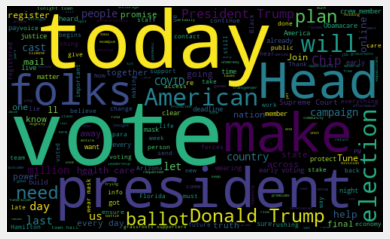

In [52]:
allWords = ' '.join( [twts for twts in df['Tweets']] )
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [54]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,You have the power to own the outcome of this ...,1.000000,0.300000,Positive
1,Wear a mask. Wash your hands. Vote out Donald ...,0.000000,0.000000,Neutral
2,I’ve had a rule my entire life: No matter what...,0.812500,0.200000,Positive
3,We are in a battle for the soul of the nation....,0.362963,0.081481,Positive
4,: If you live in any of these states and you p...,0.500000,0.136364,Positive
...,...,...,...,...
95,The election is already underway.\n\nMillions ...,0.000000,0.000000,Neutral
96,"With just three weeks until Election Day, I’m ...",0.000000,0.000000,Neutral
97,"215,000 Americans have died from COVID-19 on D...",0.650000,0.341667,Positive
98,"I’m in Pembroke Pines, Florida, to discuss my ...",0.033333,0.016667,Positive


In [59]:
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Positive'):
        print(str(j) + ') '+sortedDF['Tweets'][i])
        print()
        j = j+1

1) You have the power to own the outcome of this election — but only if you vote.

Head to  and make your plan to cast your ballot today.

2) I’ve had a rule my entire life: No matter what’s happening, no matter how important the meeting, I’ll always answer a call from my grandchildren. 

3) We are in a battle for the soul of the nation. 

The forces of darkness, the forces of division, the forces of yesterday are pulling us apart, holding us down, and holding us back.

We must free ourselves of all of them.

4) : If you live in any of these states and you plan to vote by mail, your ballot must be requested by sometime this week. Fin…

5) I believe there is not a single thing we cannot accomplish as a country if we do it together. 

6) From tackling climate change to making community college free for all — I've got big plans for the country.

And I'll pay for them by making sure the super-wealthy, like President Trump, pay more than $750 in federal income taxes.

7) I’ve spent my entir

In [60]:
j=1
sortedDF = df.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Negative'):
        print(str(j) + ') '+sortedDF['Tweets'][i])
        print()
        j = j+1

1) Folks, if you live in Illinois, today is your last day to register to vote online. Don’t wait, head to  and register before it’s too late.

2) Turns out Twitter isn’t so bad when you read tweets that aren’t from President Trump. 

3) Violence against transgender and gender non-conforming people — particularly Black and Brown transgender women — is an epidemic that needs national leadership. But Donald Trump has done nothing but fan the flames of transphobia.

It has to end. 

4) Nebraska — today is your last day to register to vote online and by mail. Head to  to get registered before it’s too late.

5) Two of the things I've cared about throughout my whole career:

1. Improving the criminal justice system.
2. Putting Black Americans in a position to gain generational wealth.

And as president, I will continue that fight every day.

6) Donald Trump is rushing through Justice Ginsburg's replacement because he's laser-focused on destroying the Affordable Care Act. 

Here's what's at s

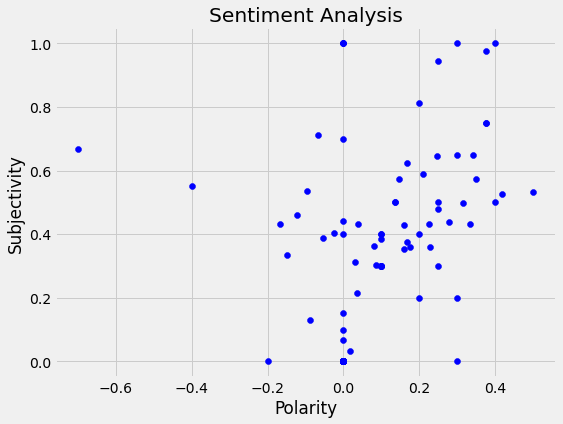

In [61]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [62]:
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round( (ptweets.shape[0] / df.shape[0]) *100, 1)

50.0

In [65]:
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

round( (ntweets.shape[0] / df.shape[0] *100), 1)

11.0

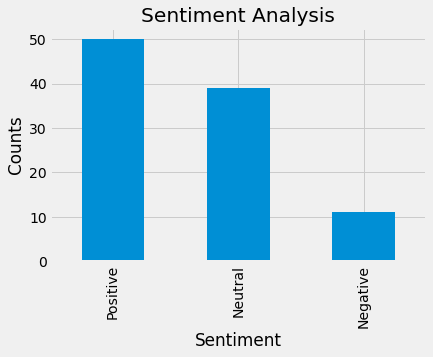

In [66]:
df['Analysis'].value_counts()

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()